# TP1 son 
## Hocine ABDELHAMID 
### M2 ISI, 21100727

</br>

## Colas JEANNOT 
### M2 ISI, 3800225
----

### TP1 : propagation of a sound wave and acquisition with a microphone array

In this tutorial, we will study the sound wave we get on output when the microphone are in an array configuration.


### 1.1 preparation
1. Express $z_n$ as a function of the spacing d between the microphones.

On a directement : 
$$z_n = d\times(n - \frac{N}{2}) - \frac{d}{2}$$



### 1.1.1 Wave Front

#### Assumption 1 : the wave front is assumed to be a plane, cf. Fig1.
2. Express $d_n$ as a function of $z_n$ and the angle  $\theta _s$ , which is the angle of incidence defined
with respect to the axis [O, z] of the microphone array.
<img src= "images/Fig1.png">

$$d_n = -z_n\times cos(\theta _s)$$

this distance can either be positive or negative, depending on what microphone. A negative $d_n$ would represent a microphone that is closer from the source from the origin



3. Deduce the angle of incidence  $\theta _s$ , as a function of the delay $\delta _{\tau _n}$ 

as we have $d_n$, we know that $\delta _{\tau _n}  = \frac{d_n}{c}$ where c, is the sound celerity
$$\delta _{\tau _n}  = \frac{d_n}{c} = \frac{-z_n\times cos(\theta _s)}{c}$$
$$\theta _s = Arccos(-\frac{\delta _{\tau _n}c}{z_n})


### Assumption 2 : the wave front is assumed to be spherical, cf. Fig2.
4. Express the (Cartesian) coordinates of the source ($x_s$ , $z_s$ ) as a function of the distance $r_s$ between the source and the centre of the microphone array, the position of the $n_{th}$ microphone $z_n$ , the distance $d_n$ and the angles  $\theta _s$ and $d_n$ , the angle between the wave arriving at the $n_{th}$ microphone and that arriving at O.

here $d_n$ isn't equal to $d_n = z_n\times cos(\theta _s)$ anymore

we have :
$$z_n  = (r_s + d_n)\times sin(\alpha _s + d\alpha _n) + z_n$$
$$x_n  = (r_s + d_n)\times cos(\alpha _s + d\alpha _n)$$


5. Deduce the equation verified by $d{n}$ :
$$(r_s + d_n)² = x_s² + z_s²$$


$$ d_{n}^2 + 2d_{n}r_{s} = z_{n}^2 - 2r_{s}z_{n}cos\theta_{s} $$



6. Propose a method to derive the position of the source, given by the angle of incidence $\theta{s}$ with respect to the axis [O,z) of the microphone array, and its distance from the origin $r{s}$.


On peut utiliser notre connaissance de l'angle theta et de la distance rs pour approximer la position en utilisant les données des micros et en les comparant. Par exemple, en prenant l'angle dn que l'on peut déduire avec le retard entre les microphones et l'origine.


7. What happens to equation in question 5 when rs goes to the infinite ? Conclude.

On peut réecrire l'équation de la forme : 
$$ \frac{d_n²}{r_s} + 2d_n = \frac{z_n²}{r_s} -2z_n cos(\theta _s)$$

$r_s$ tendant vers l'infin, on peut écrire en simplifiant : 

$$ d_n = -z_n cos(\theta _s )$$

On retrouve par conséquent l'équation de l'approximatoin des ondes planes


In [61]:
# All required import
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from client import array
import time
from utils import * 
#%matplotlib notebook
%matplotlib ipympl
Fs = 20000
t = [i/Fs for i in range(2048)]
# Faire la phase en f0, calculer le déphasage, retrouver delta _t .

In [62]:
# Case qui permet l'acquisiton et l'enrigistremetn
antenne=array('server') 

### 1.2.2 Speed of sound

On charge dans un premier temps , le fichier à 100 Hz

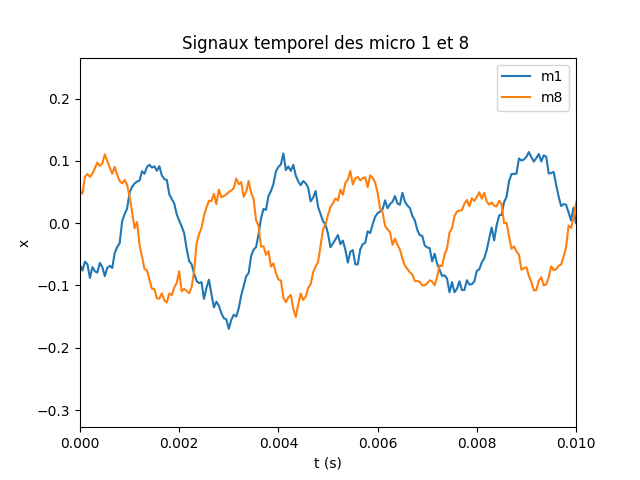

In [65]:
# Affichage du isgnal
m100 = np.load("Enregistrements/55cm_theta0_400hz.npy")
def trace_m1_m8(m, xmax = 0.01, s = '', Fs= 20000):
    t = [i/Fs for i in range(m.shape[1])]
    plt.figure()
    for i in [0,7]:
        plt.plot(t,m[i], label= f"m{i +1}")
    plt.legend()
    plt.title(f'Signaux temporel des micro 1 et 8 {s}')
    plt.xlim((0,xmax))
    plt.xlabel("t (s)")
    plt.ylabel("x")
trace_m1_m8(m100, xmax = 0.01)

Mfft = np.fft.fft(m100)
Freq = np.arange(0, Fs, Fs/2048)



Le signal est plutot bruité, mais il sera possible de retrouver la vitesse du son comme on le verra par la suite

On trace le module de la transformé de fourrier ainsi que la phase pour les micros 1 et 8

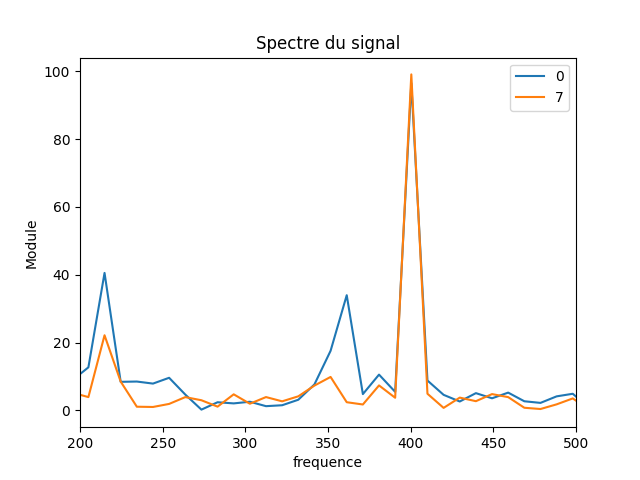

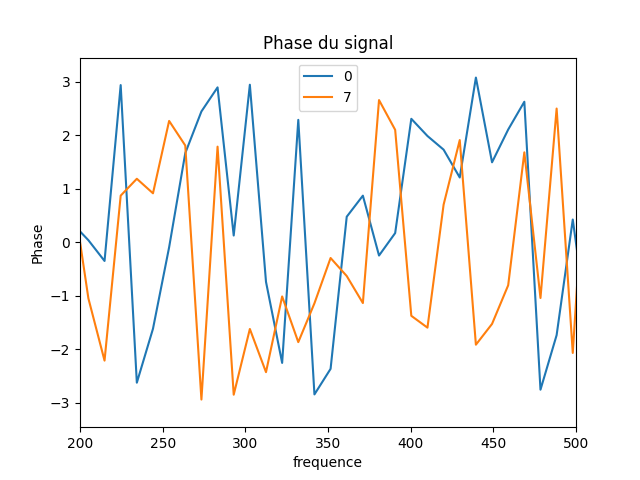

In [66]:
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m100[i], Fs,i, "modulus", newFig = not i, limaxis = (200,500))
plt.legend()
for i in mics:
    fourier(m100[i], Fs, i, "phase", newFig = not i, limaxis = (200,500))

plt.legend()


On remarque que le signal est un peu bruité, mais on retrouve bien notre pic à 400 Hz comme on s'y attendait. plusieurs La fft présente aussi des pics dans les basses fréquences qui s'expliquent par l'environnement de travail lors de la prise des mesures. Les fréquences aux alentours de 175 Hz peuvent correspondre à des personnes en train de parler.

5. Measure the time needed by the wave to travel the distance between the microphones,
using :

— (a) the observation of the waveform

— (b) the phase of the spectra.
6. Deduce the speed of sound propagation, also known as the celerity. Compare with the
theoretical value at room temperature.

a) On observe le déphasage entre les deux signaux temporelle, on recueille le temps t pour lesquel lees signaux sont dans la meme configurations.
    il suffit ensuite de faire v = (d*7)/(t2-t1)

<img src= "images/WF_400hz.png"/>

En s'attardant sur le deux premiers pics on a : </br>
t2 = 0.0014s </br>
t1 = 0.0004s </br>
En faisant le calcul on trouve v = 400m/s  ce qui semble plutot correte en comparaison des 340m/s théorique à température ambiante</br>

b) On observe le déphasae en f0 = 400hz, on peut ensuite retrouver le retard : $\Delta t = \frac{\Delta \phi}{2 \pi f_0}$ </br>
a 400hz on a : </br>
<img src="images/p400hz.png"/>

$\phi _1 = 2.21$ </br>
$\phi _2 = -1.22$ </br>
donc $\Delta \phi  = 3.43$ et $\Delta t = 1.365e-3$ (Avec la formule donnée plus haut)

on trouve alors v = $\frac{0.06*7}{\Delta t}$ = 307m/s 
ce qui est encore assez proche de la vitesse théorique a temperature ambiante



7. Repeat the previous steps with a white noise sound source

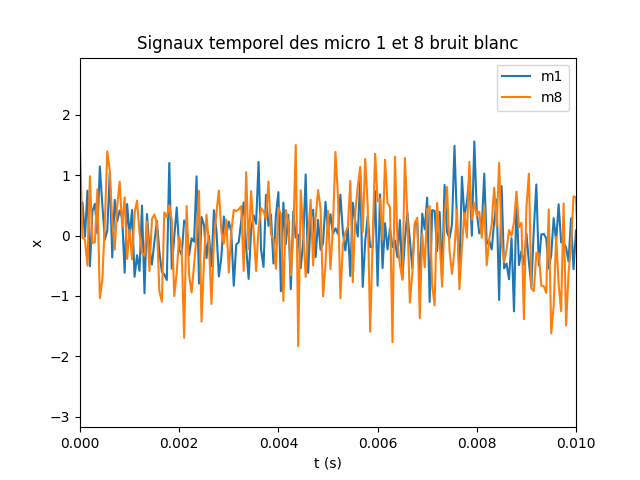

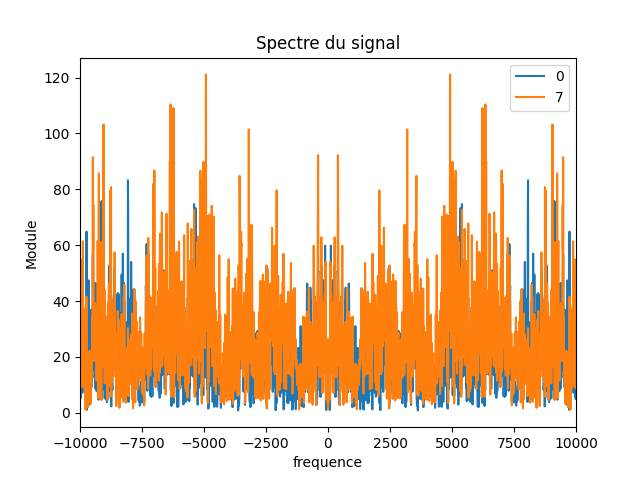

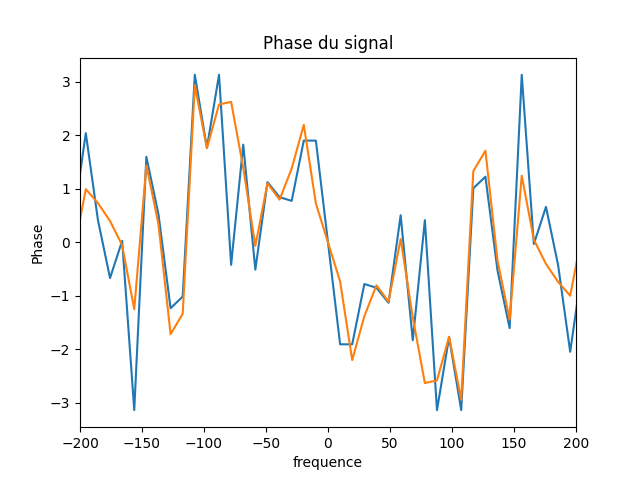

In [67]:
m_noise = np.load("Enregistrements/white_noise.npy")
trace_m1_m8(m_noise, 0.01, "bruit blanc")
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m_noise[i],Fs,i, "modulus", newFig = not i, limaxis = (-10000,10000))
plt.legend()
for i in mics:
    fourier(m_noise[i], Fs, i, "phase", newFig = not i, limaxis = (-200,200))

On peut utiliser la cross correlation : 

$$R_{ij}(\tau)  = E [m_i (t) mj(t-\tau)] $$
Ensuite, on retrouve le TDOA en retrouvant l'argument maximum de la cross corrélation

In [8]:
# corr = np.correlate(m_noise[0], m_noise[7], "full")
# s_tab = []
# for tau in range(4000):
#     s = 0
#     for n in range(len(m_noise[0])):
#         try:
#             s+= m_noise[0][n+tau]*m_noise[7][n]
#         except IndexError:
#             ...
#     s_tab.append(s)


# a = np.argmax(corr)
# plt.figure()
# plt.plot(corr)
# plt.show()
# print(corr[a] / Fs)

In [9]:
Mfft = np.fft.fft(m_noise)
S = Mfft[0] * np.conj(Mfft[7])
phiPHAT = 1/np.abs(S)



8. Discuss and compare the accuracy of the three methods tested above.


Pour la méthode a), il suffit de détermeienr le retard qu' a la courbe du micro 7 par rapport a celle du micro 1. Cette méthode à l'aventage d'être rapide a éxectuer, et direct. cependant, on ne peut atteindre une bonne précision notemment à cause du bruit environnant qui rend difficile la lecture du retard entre les signaux.

Pour la méthode b), il suffit de déterminer le déphasage entre les deux signaux à la fréquence f0 grace a la transformée de fourier.
La phase est plus lisse et plus facile a lire, et cela augmente la précision de la mesure.

pour la méthode du bruit blanc :





9. Repeat the previous steps at a frequency of 3 kHz

In [10]:
# cette fonction lit le fichier h5 directement depuis le path
# antenne3000 = load_antenne("50cm_lateral/3000.h5")
# m3000 = antenne3000.read()

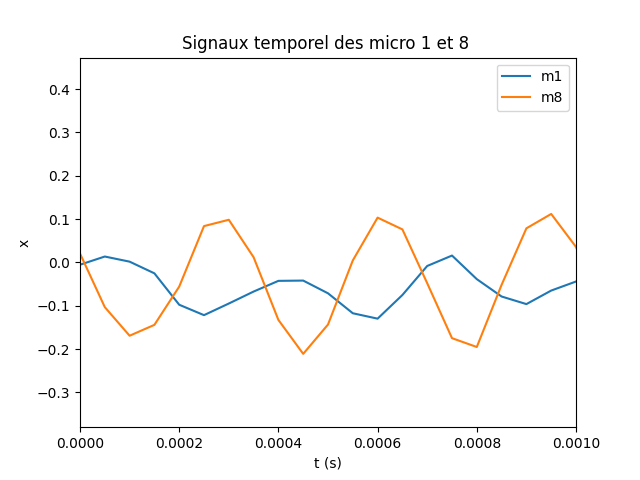

In [68]:
m3000 = np.load("Enregistrements/50cm_theta0_3000hz.npy")
trace_m1_m8(m3000, 0.001)

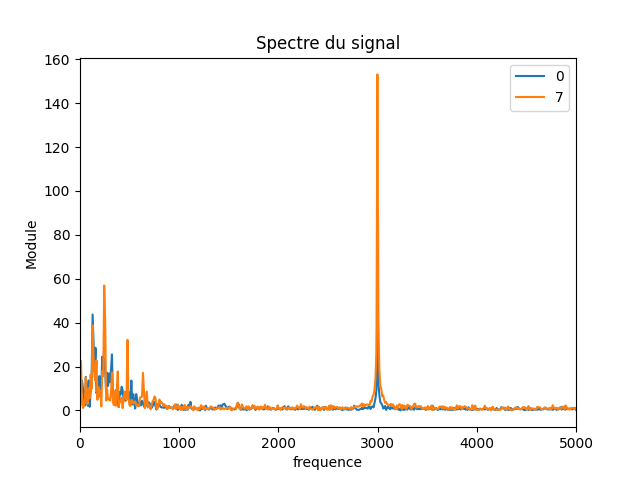

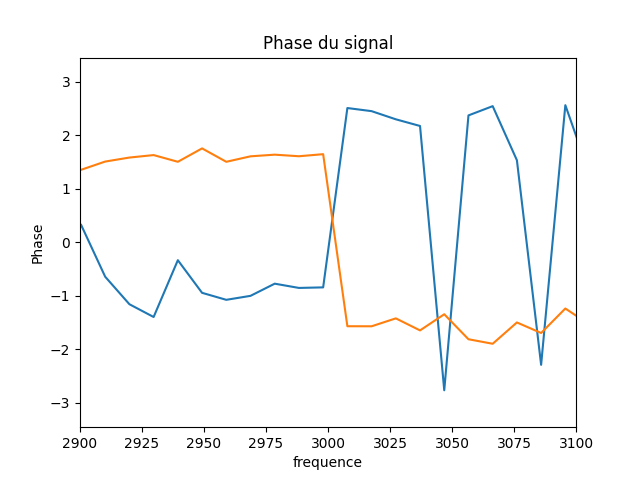

In [69]:
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m3000[i], Fs,i, "modulus", newFig = not i, limaxis = (0,5000))
plt.legend()
for i in mics:
    fourier(m3000[i], Fs, i, "phase", newFig = not i, limaxis = (2900,3100))


10. Use the first two methods described above - using a pure tone in the time domain (a) and in the frequency domain (b) - to estimate the speed of sound. Interpret the results obtained

<img src="images/WF_3millehz.png"/>

On observe un pic en t2 = 0.00075 un autre en t1 = 0.0006 qui nous donne  v = 2800m/s </br>
On voit uqe l'odre de grandeur n'est plus le même, on est trop loin de la valeur théorique on verra dans la question suivante qu'il existe une fréquence limite au dela de laquelle on ne peut plus déterminer la vitesse du son avec ces méthodes

Le module de latransformée de fourier donne un bon pic en 3000, et on a evidemment du bruit dans les basses fréquences qui provient par exemple de nos camarades qui parlaient pendant nos acquisitions.

La phase nous donne, si on zoom sur f = 3000 : </br>
<img src="images/p3000hz.png"/>

$\phi _1 = -0.18$  </br>
$\phi _2 = 1.04$ </br>
donc $\Delta \phi  = 1.22$ et $\Delta t = 6.47e-5$

on trouve alors v = $\frac{0.06*7}{\Delta t}$ = 6489/s 

La fréquence f0 est trop grande pour déterminer v correctement


11. Deduce the limit frequency above which it is no longer possible to determine the delay between the acoustic waves measured. In the following, this limit frequency is noted flim.

Avec une fréquence trop élevée il devient impossible de déterminer le retard entre les deux signaux.</br>

En effet on a $\nu = \frac{c}{\lambda}$ avec $\lambda$ la longueur d'onde le l'onde acoustique.</br>
La longueur d'onde correspond à la distance parcouru par l'onde pendant une période.
On sait que théoriquement c = 340m/s à température ambiante.</br>
ainsi $\lambda = \frac{c}{v}$, plus la fréquence $\nu$ est grande, plus $\lambda$ est petit. </br>
si la longueur d'onde est plus petite que la distance séparant les deux micros 1 et 7, il est impossible de de déterminer le délai entre les deux ondes acoustiques.</br>
en effet il y aura plusieurs periodes en une ce qui rendra la bonne lecture impossible.



d_17 = 0.06*7 = 0.42m</Br>
$f_{lim} = \frac{c}{0.42}$ = 809 hz 





### 1.2.3 Radiation from the source
12. Place the source in the axis of one microphone of the array, as close as possible ( 1 cm) to the microphone capsule and directed towards the microphone under consideration. Generate a pure tone below the limit frequency. Display the recorded waveform and calculate its RMS value.



In [70]:
# 500hz 1cm placé deant le micro 4 (central)
# a_500_1= load_antenne("500hz_front/500hz_001cm.h5")
# m_500_1 = a_500_1.read()


The RMS value is 3.9897229902625355


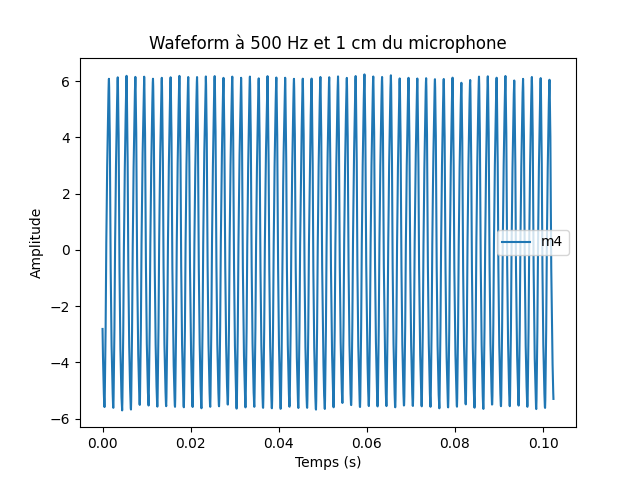

In [71]:
# 500hz 1cm placé deant le micro 4 (central)
m_500_1 = np.load("Enregistrements/1cm_90deg_500hz.npy")
t = [i/Fs for i in range(m_500_1.shape[1])]
plt.figure()
plt.plot(t,m_500_1[4], label = "m4")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Wafeform à 500 Hz et 1 cm du microphone")

plt.legend()

def RMS(x):
    n = len(x)
    return (np.sum(x**2)/n)**0.5

print(f"The RMS value is {RMS(m_500_1[4])}")


13. Increase the distance between the source and the microphone under consideration. Repeat the above steps for diﬀerent values of this distance. NB : For each value, make sure that the same "sound volume" is not modified at the source interface.

In [72]:
def RMS(x):
    n = len(x)
    return (np.sum(x**2)/n)**0.5

RMS de : 3.9897229902625355
RMS de : 0.25940495375178396
RMS de : 0.18741424690583638
RMS de : 0.19803933241617858


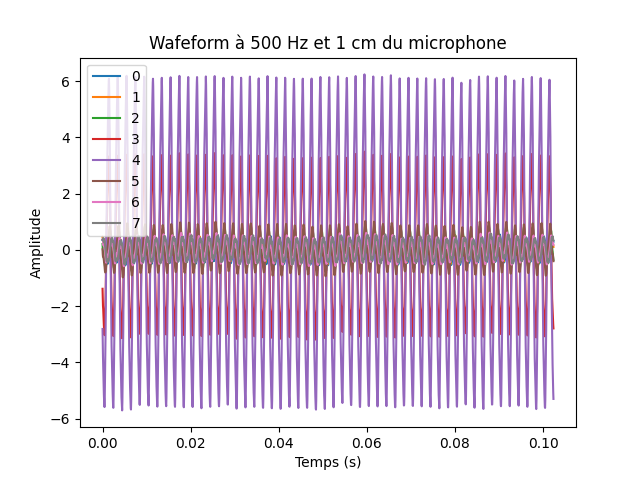

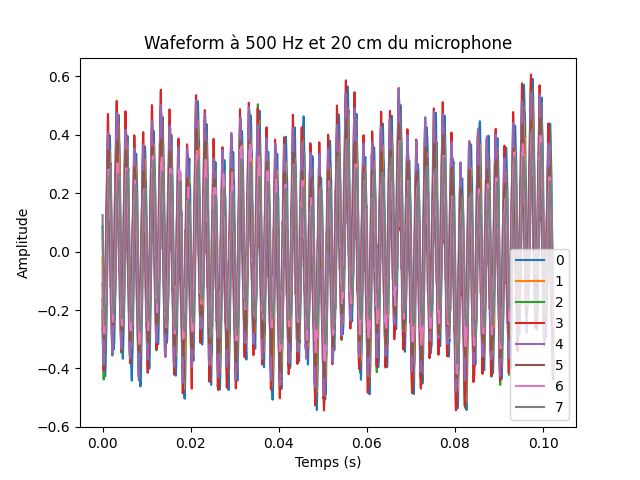

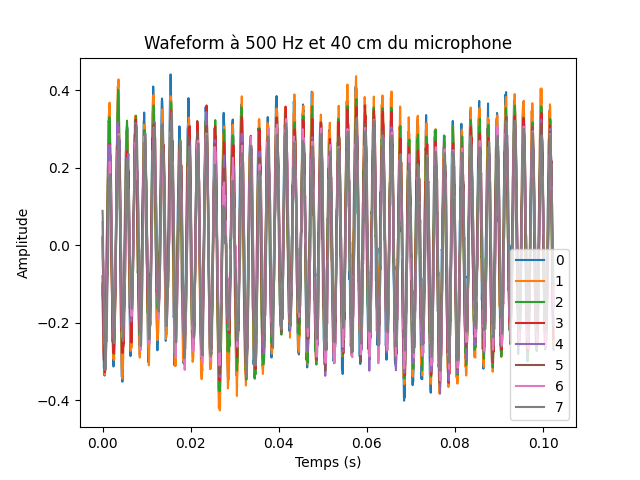

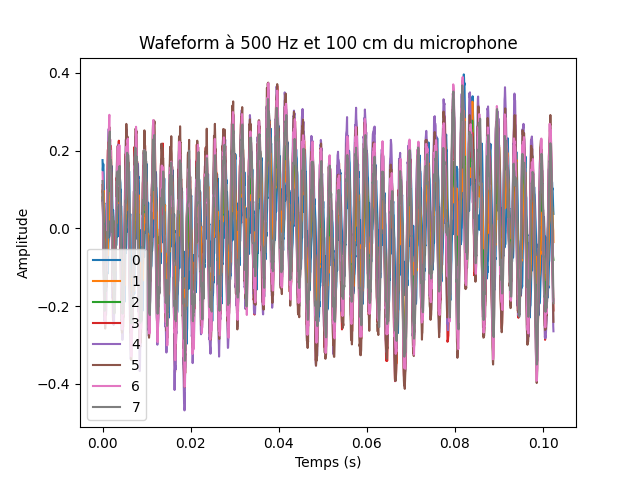

In [73]:
path = glob.glob("Enregistrements/500hz_front_savednpy/*")
distances =[]
RMS_tab  = []
Fs = 20000
for p in path:
    dist  = p[::-1]
    cind = dist.index('c')
    _ind = dist.index('/')
    dist = int(dist[cind +1: _ind][::-1])
    distances.append(dist)

    mc = np.load(p)

    rootMS = RMS(mc[4]) 
    RMS_tab.append(rootMS)
    plt.figure()
    for i in range(len(mc)):
        plt.plot(t, mc[i], label = i)
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.title(f"Wafeform à 500 Hz et {dist} cm du microphone")
    plt.legend()
    print(f"RMS de : {rootMS}")





14. Plot the RMS values as a function of the distance between the sound source and the microphone under consideration.

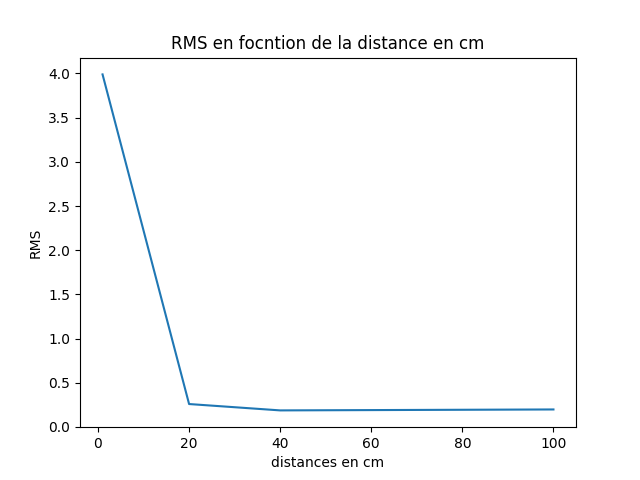

In [18]:
plt.figure()
plt.plot(distances, RMS_tab)
plt.xlabel("distances en cm")
plt.ylabel("RMS")
plt.title("RMS en focntion de la distance en cm")
plt.show()

15. Interpret the shape of this curve.

Nous n'avons malheureusemtn pas eu le temps de predre assez de mesure pour la RMS </br>
Il est cependant normal que la RMS baisse étant donné que  on s'éloigne du micro, l'amplitude du son est moins grande </br>
on voit que la RMS tend vers une certaines valeur qui correspond au bruit environnant de la salle

### 1.2.4 Wave fronts

16. Place the source in the direction of the centre of the microphone array, at a distance greater than the length of the array.

On utilise une acquisition a 500hz et a 40cm du mic 4

In [74]:
# ant = load_antenne("500hz_front/500hz_040cm.h5")
# m = ant.read()
m = np.load("Enregistrements/440Hz_30deg_x29_z27.npy")

17. Read the coordinates (x s , z s ) of the source and deduce the angle of incidence $\theta _s$  of the source, relative to the [O, z) axis of the microphone array.


On a placé le signal à environ xs = 29, zs = 27\
On détermine un angle d'environ : $\theta _s$ = 42°


18. Generate a pure tone at a frequency below the limit frequency previously measured. Record and display the waveforms measured by each microphone of the array.

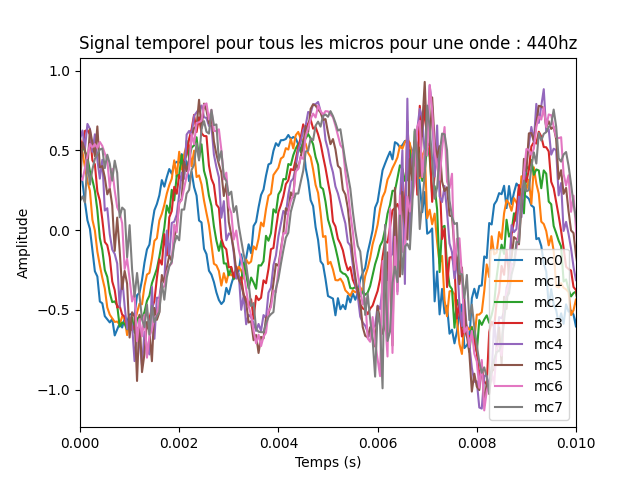

In [75]:
plt.figure()
for i in range(len(m)):
    plt.plot(t, m[i], label = f"mc{i}")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal temporel pour tous les micros pour une onde : 440hz")
plt.xlim((0,0.01))
plt.legend()



19. Estimate the time delay between each of these waveforms. Deduce for each microphone, the delay $\delta _n$ needed by the wave to travel the distance dn defined in preparation (see Fig.1).


On analysera tous les retards par rapport au 5eme micro.  et par rapport au 4 eme micro. 
En faisant la moyenne des deux, on aura la valeur du retard par rapport a l'origine.
</br>

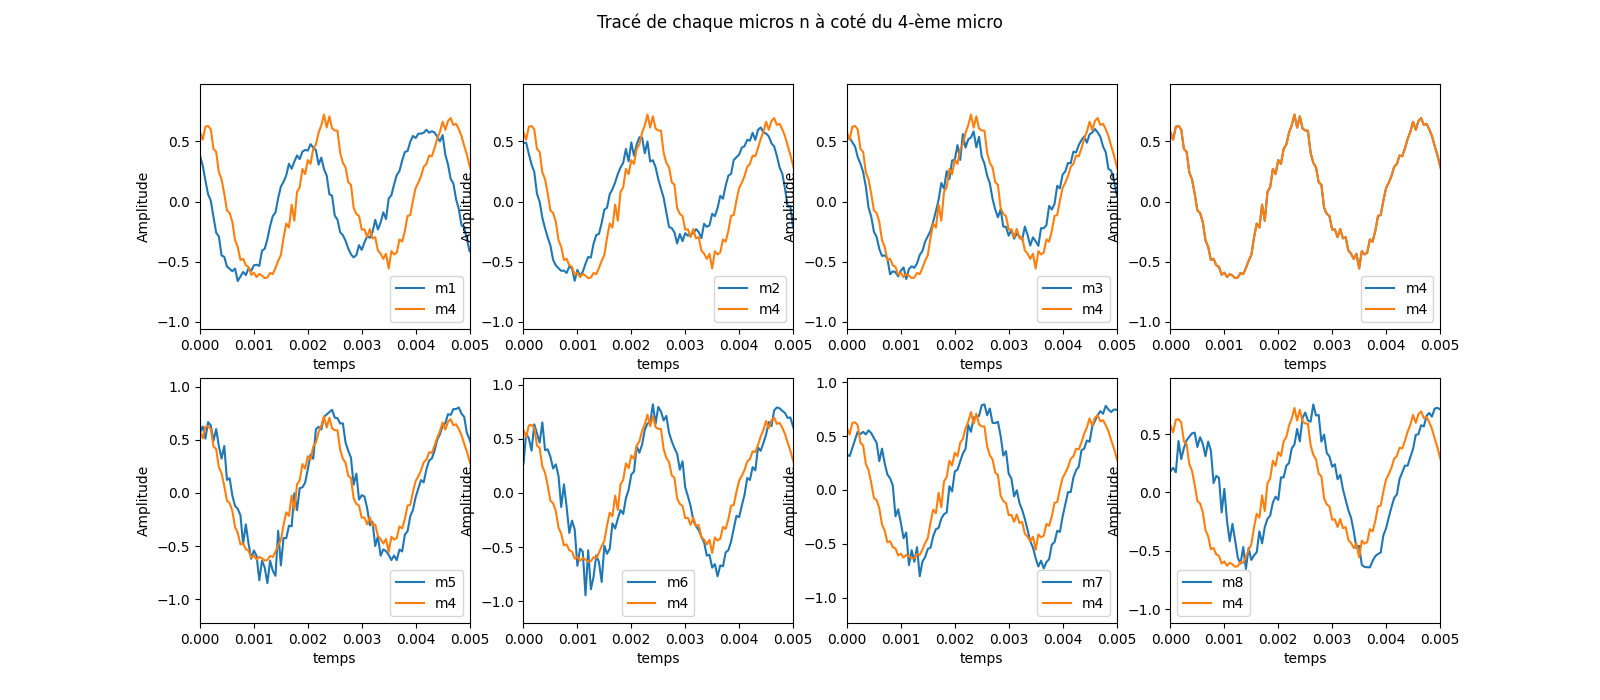

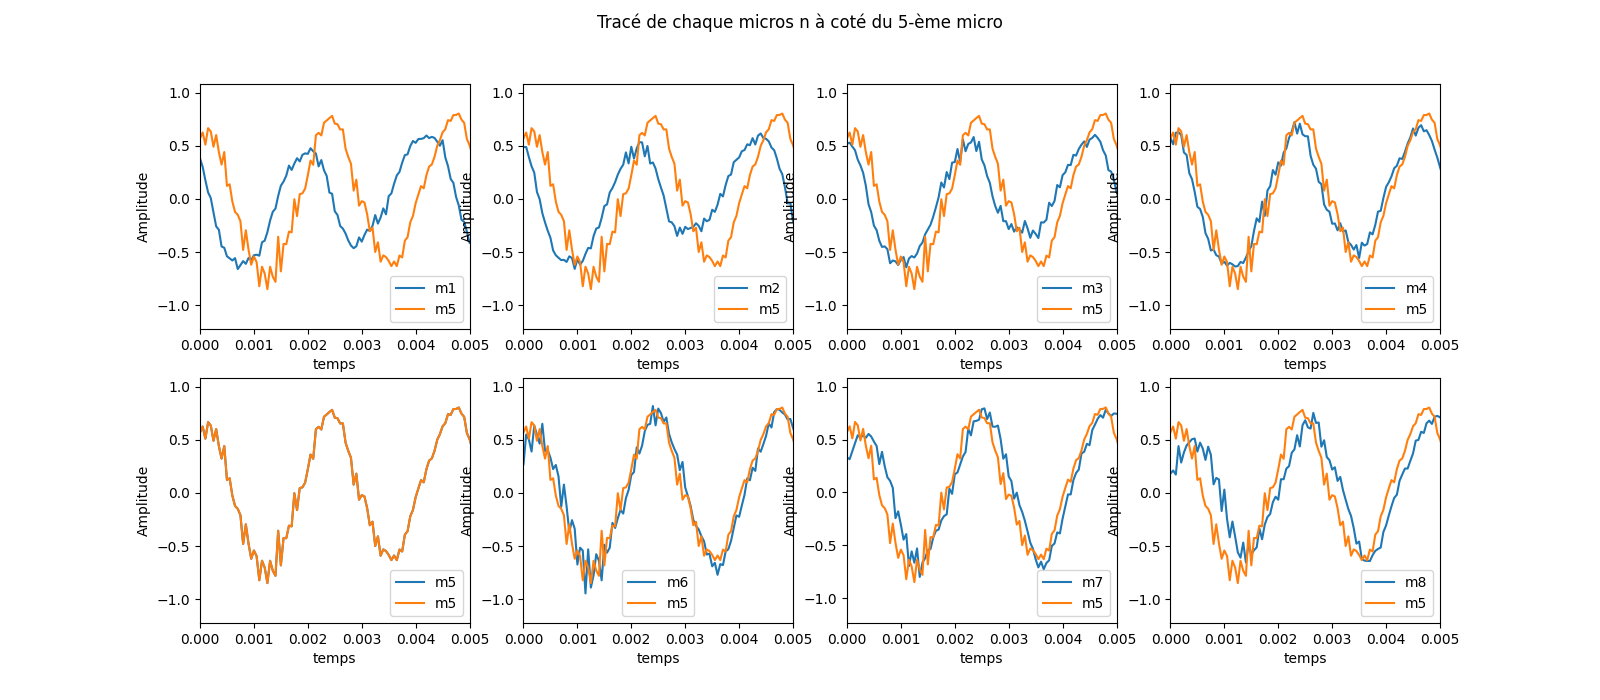

In [76]:
k_tab = [3,4]
for k in k_tab:
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(f"Tracé de chaque micros n à coté du {k+1}-ème micro")
    for i in range(len(m)):
        plt.subplot(2,4,i+1)
        plt.plot(t, m[i], label = "m" + str(i+1))
        plt.plot(t, m[k], label = "m" + str(k+1))
        plt.xlabel("temps")
        plt.ylabel("Amplitude")
        plt.xlim((0,0.005))
        plt.legend()

    plt.show()



$\delta _{1,5}$ = 0.41ms \
$\delta _{2,5}$ = 0.29ms\
$\delta _{3,5}$ = 0.15ms\
$\delta _{4,5}$ = 0.09ms\
$\delta _{5,5}$ = 0ms\
$\delta _{6,5}$ = -0.05ms\
$\delta _{7,5}$ = -0.15ms\
$\delta _{8,4}$ = -0.26ms

$\delta _{1,4}$ = 0.37ms\
$\delta _{2,4}$ = 0.21ms\
$\delta _{3,4}$ = 0.07ms\
$\delta _{4,4}$ = 0ms\
$\delta _{5,4}$ = -0.09ms\
$\delta _{6,4}$ = -0.16ms\
$\delta _{7,4}$ = -0.22ms\
$\delta _{8,4}$ = -0.35ms


In [77]:
d = 0.06
N = 8
n = np.arange(1,9,1)

delta_i_5 = np.array([0.41,0.29,0.15,0.09,0,-0.05,-0.15,-0.26])*10**(-3)
delta_i_4 = np.array([0.37,0.21,0.07,0,-0.09,-0.16,-0.22,-0.35])*10**(-3)

delta_n = (delta_i_5 + delta_i_4)/2
print(delta_n)



[ 3.90e-04  2.50e-04  1.10e-04  4.50e-05 -4.50e-05 -1.05e-04 -1.85e-04
 -3.05e-04]


Ainsi on a trouvé $\delta _{\tau_{n}}$, le délai de chaque onde par rapprot a l'origine

20. Interpret the shape of the curve delta n (defined in the preparation) as a function of z n , coordinates of the microphones. Conclude on the approximation to adopt on the shape of the wavefront.

Text(0, 0.5, 'delta_n (s)')

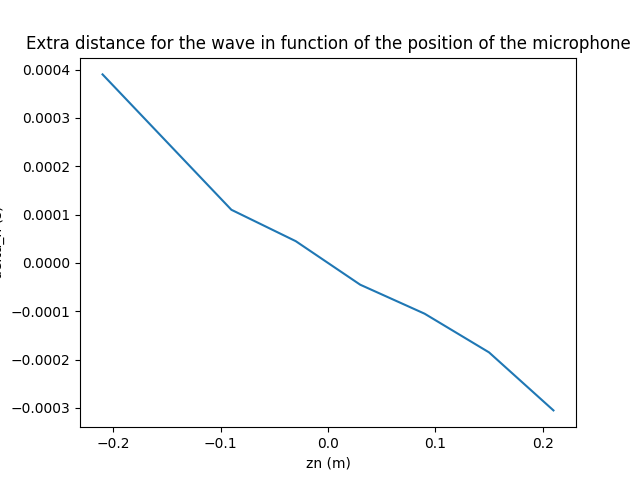

In [78]:
zn = d*(n-N/2) - d/2
plt.figure()
plt.plot(zn, delta_n)
plt.title("Extra distance for the wave in function of the position of the microphone")
plt.xlabel("zn (m)")
plt.ylabel("delta_n (s)")

On a choisi un d'envniron 42°, il est normal que les microphone les plus a droite, recoivent l'onde avec moins de retard que ceux situé a gauche (voir figure 1). Cela explique la forme de notre tracé.

De plus $\delta _n$ semble linéaire en fonction de $z_n$ on peut alors faire l'approximation d'une onde plane (planar wavefront)

21. Locate the source using these measurements and the equations obtained in preparation.  Compare with the real position of the source.

On calcul en premier $\theta _s$ avec la formule : 
$$\theta _s = Arccos(-\frac{\delta _{\tau _n}c}{z_n})a$$

on calculera la moyenne sur tous les n pour avoir un thetas fiable

In [79]:
c = 340

theta_s = np.mean(np.arccos(-(delta_n*c)/zn))

print("theta_s =", theta_s * 180/np.pi)


theta_s = 60.336322674014234


On obtiens alors une approximation de l'angle a laquelle la source était, c'est à dire environ 60° . En réalité on a mesuré environ 42° mais ces mesures ne sont pas totalement précises étant donnée qu'on les a faites avec une règle de 15cm. De plus la considération de l'onde comme plane n'est qu'une approximation. \
Ces deux facteurs peuvent expliquer cette différence


22. Place the source towards the origin O, at a distance of the same order of magnitude as the length of the microphone array. Then, repeat all the previous steps.

Nous n'avons pas pu effectuer cette partie des mesures en tp.

23. At what distance from the source to the microphone array can the sound wave be considered a planar wave

On peut considérer l'onde comme plane lorque la distance est supérieur (a peu près) a la longueur du champ de micro, en dessous, cette approximation n'est plus valide, il faut considérer l'onde comme sphérique.



# BONUS 

24. Place the source on the axis [0, x) perpendicular to the microphone array, towards the middle of the array, at a distance of about 1 m. Read the coordinates of the source and the angle of incidence on the microphone array. Generate a sine wave with a frequency below the limit frequency. Calculate and plot the output signal of the microphone array.  Calculate its RMS value.